In [ ]:
%matplotlib inline

from __future__ import print_function 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(3342)

In [9]:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x,x**2))
beta = np.array([1,0.1,10])
e = np.random.normal(size=nsample)

In [10]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [11]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.623e+06
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.24e-242
Time:                        11:30:29   Log-Likelihood:                -139.51
No. Observations:                 100   AIC:                             285.0
Df Residuals:                      97   BIC:                             292.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9717      0.292      3.333      0.0

In [12]:
print('Parameters: ', results.params)
print('R2 : ' , results.rsquared)

Parameters:  [ 0.9716906   0.21977356  9.98384122]
R2 :  0.99998950863


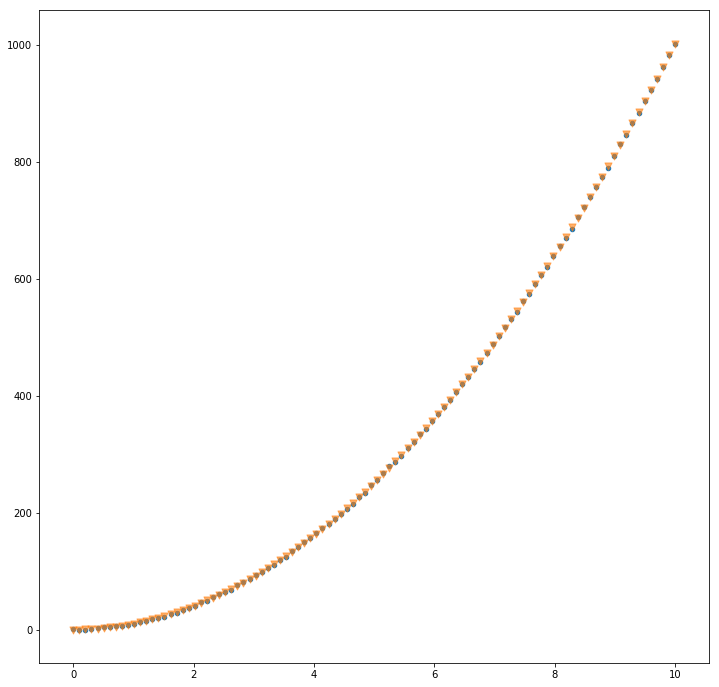

In [41]:
plt.figure(figsize=(12,12))

plt.scatter(x,y, s=20)
plt.scatter(x, results.params[0]+results.params[1]*x+results.params[2]*x*x, s=50,alpha=0.6,marker="v")
plt.show()


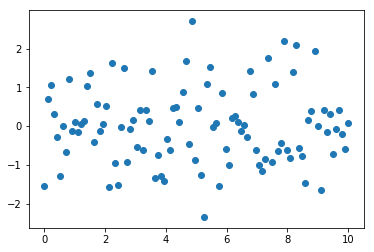

In [45]:
plt.scatter(x, (results.params[0]+results.params[1]*x+results.params[2]*x*x)-y)
plt.show()

In [78]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1 
groups[40 :] = 2

#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups,drop = True)

x = np.linspace(0,20,nsample)
#drop reference category
X = np.column_stack((x,dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e 

In [83]:
res2= sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     577.6
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.68e-36
Time:                        13:01:23   Log-Likelihood:                -67.311
No. Observations:                  50   AIC:                             142.6
Df Residuals:                      46   BIC:                             150.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9719      0.063     15.378      0.0

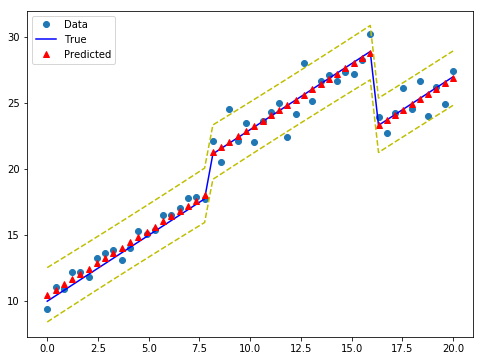

In [92]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r^', label="Predicted")
ax.plot(x, iv_u, 'y--')
ax.plot(x, iv_l, 'y--')
legend = ax.legend(loc="best")